In [1]:
import pandas as pd
import numpy as np
from k_means import my_k_means
import matplotlib.pyplot as plt

In [2]:
print("Loading data...")
# tf_idf = np.genfromtxt('data/tfidf.csv', skip_header=True, delimiter=',')
tf_idf = pd.read_csv('data/tfidf.csv')
print("Done.")

tf_idf = np.array(tf_idf)

Loading data...
Done.


In [3]:
def euc_distance(mp, mj):
    return np.linalg.norm(mp-mj)

def cos_distance(mp, mj):
    return np.dot(mp, mj)/(np.linalg.norm(mp)*np.linalg.norm(mj))

# print(euc_distance(tf_idf[0], tf_idf[1]))
# print(cos_distance(tf_idf[0], tf_idf[1]))

In [4]:
for k in [3,5,8,10,12]:
    centroids, cluster_assignments, convergence = my_k_means.k_means(
        k=k,
        data=tf_idf,
        distance=euc_distance,
        max_iter=100
    )

    with open("results/csv/kmeans/best_centroids_k{}.csv".format(k), "a+") as f:
                # f.write(str(k) + ";")
                np.savetxt(f, centroids, delimiter=";")

        # with open("cluster_assignments.csv", "a+") as f:
        #     f.write(str(k) + ";")
        #     np.savetxt(f, cluster_assignments, delimiter=";")

    with open("results/csv/kmeans/convergence_k{}.csv".format(k), "a+") as f:
            for entry in convergence:
                    f.write(str(entry[0]) + ";" + str(entry[1]) + "\n")


100%|██████████| 100/100 [05:41<00:00,  3.41s/it]


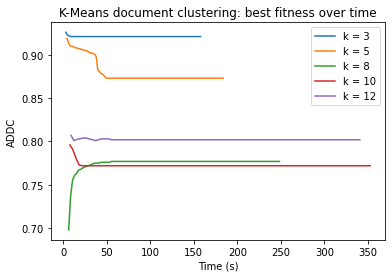

In [5]:
legend = []
for k in [3,5,8,10,12]:
    with open("results/csv/kmeans/convergence_k{}.csv".format(k), "r") as f:
        lines = f.readlines()
    
    time = []
    fitness = []
    legend.append("k = {}".format(k))

    for step in lines:
        split_line = step.strip().split(";")
        time.append(float(split_line[0]))
        fitness.append(round(float(split_line[1]), 3))
        
    plt.plot(time, fitness)
        
plt.xlabel("Time (s)")
plt.ylabel("ADDC")
plt.title("K-Means document clustering: best fitness over time")
plt.legend(legend)
plt.savefig("results/plots/k_tests_kmeans.png")
plt.show()